In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Flatten,Dense,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import tensorflow as tf

In [2]:
data=pd.read_csv('dielectron.csv')
data.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [3]:
data.tail()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
99995,146511,522575834,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,-1,1.80181,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470,1,8.44779
99996,146511,522786431,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,1,14.69110,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960,1,20.71540
99997,146511,522906124,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,1,72.81740,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050,-1,12.71350
99998,146511,523243830,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,-1,8.58671,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610,1,4.69670
99999,146511,524172389,7.64000,0.886162,5.478900,-5.25033,5.55010,-0.842662,1.410440,1,52.10880,16.807500,-4.60510,49.108400,17.42700,1.759250,-0.267427,-1,36.50430


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [5]:
data.nunique()

Run         13
Event    99976
E1       95669
px1      97213
py1      97153
pz1      98152
pt1      91788
eta1     94037
phi1     94641
Q1           2
E2       95425
px2      97392
py2      97410
pz2      97924
pt2      92789
eta2     89752
phi2     94494
Q2           2
M        93244
dtype: int64

In [6]:
data.isnull().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

In [7]:
data.fillna(0,inplace=True)

In [8]:
data.isnull().sum()

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64

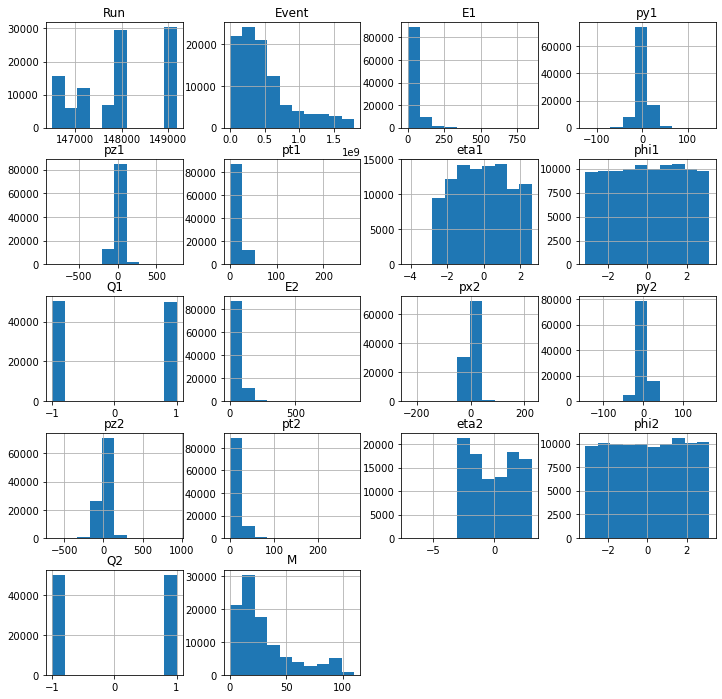

In [9]:
cols=['Run','Event','E1','py1','pz1','pt1','eta1','phi1','Q1','E2','px2','py2','pz2','pt2','eta2','phi2','Q2','M']
data[cols].hist(figsize=(12,12))
plt.show()

In [10]:
def hist_box(col):
    f,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(8,8))
    sns.set(style='darkgrid')
    sns.boxplot(data[col],ax=ax_box,showmeans=True)
    sns.histplot(data[col],ax=ax_hist)
    ax_hist.axvline(data[col].mean(),color='yellow',linestyle='--')
    ax_hist.axvline(data[col].median(),color='red',linestyle='-')
    plt.show()

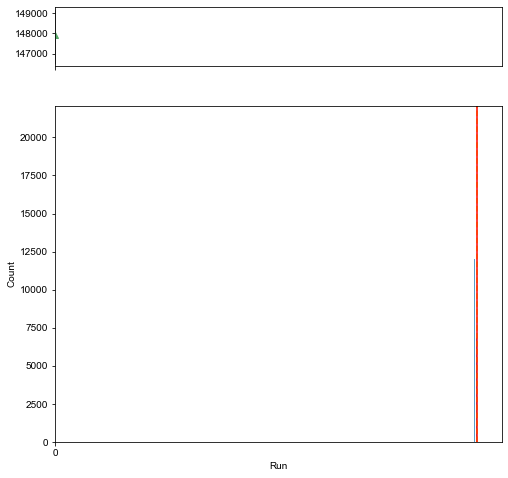

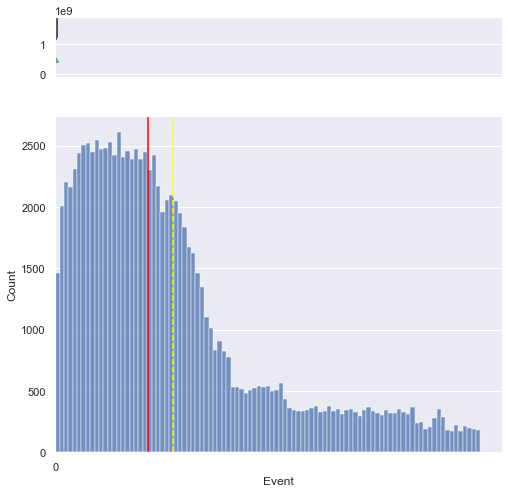

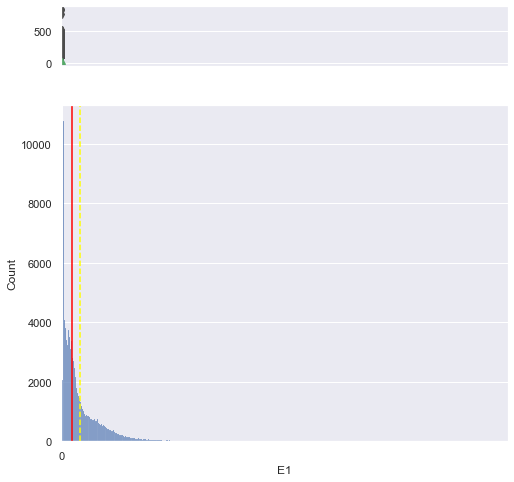

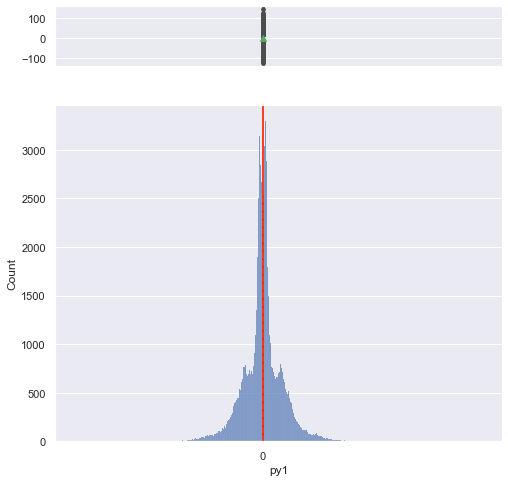

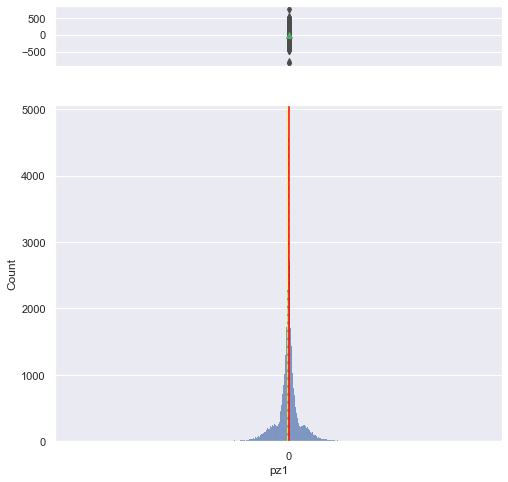

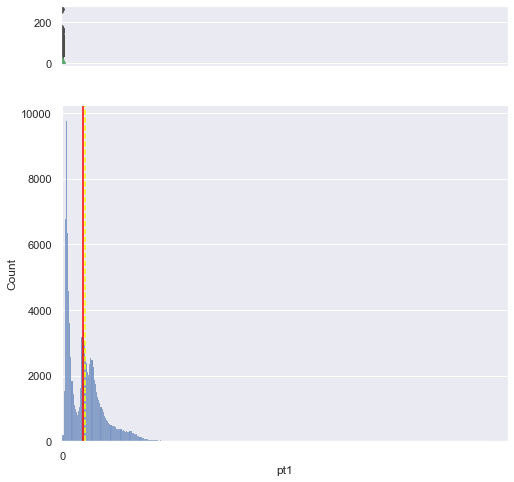

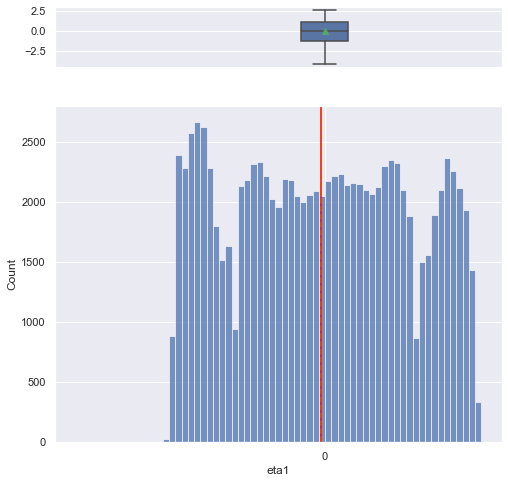

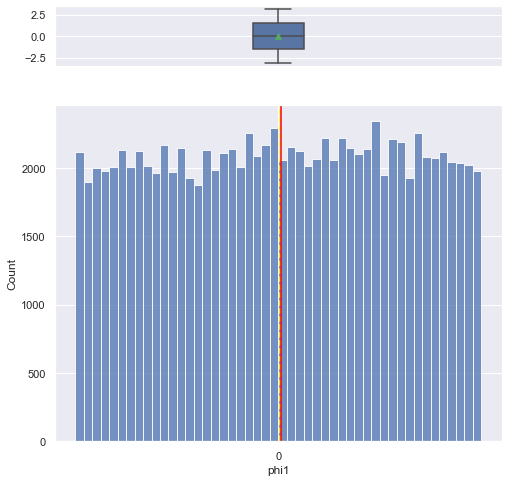

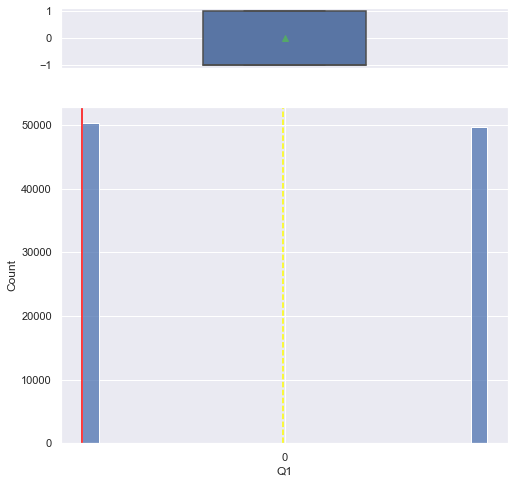

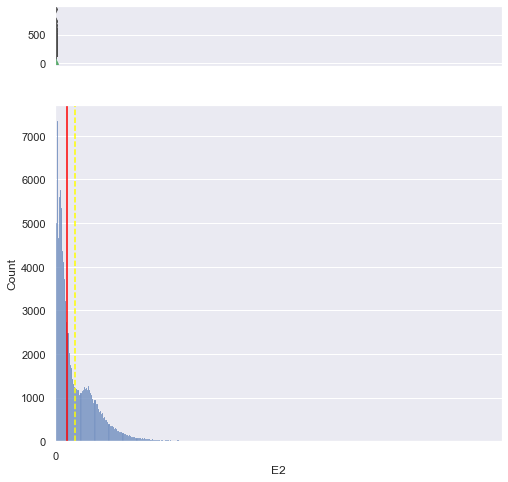

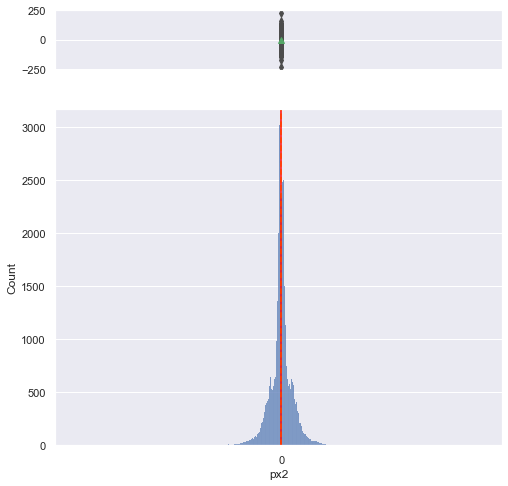

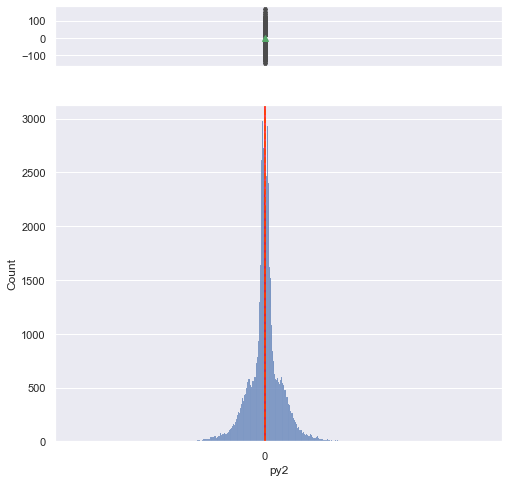

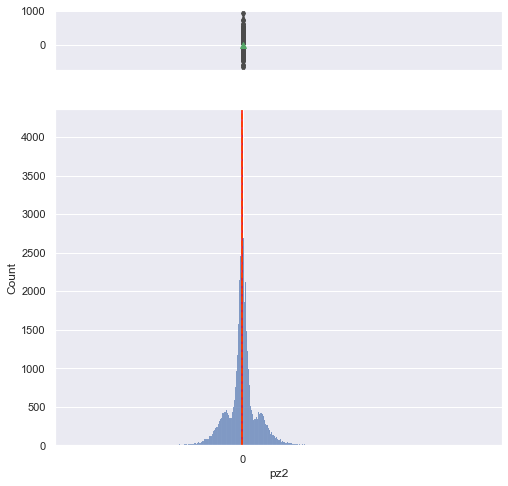

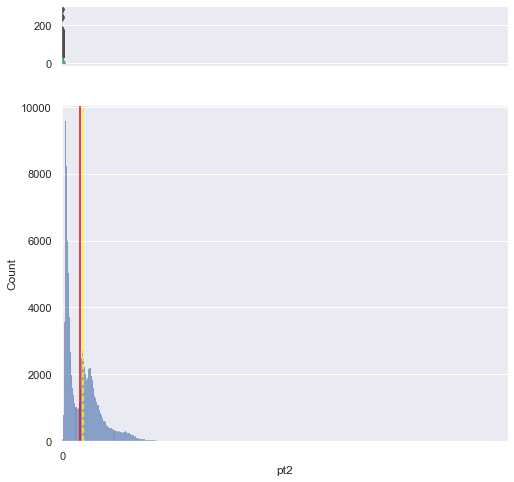

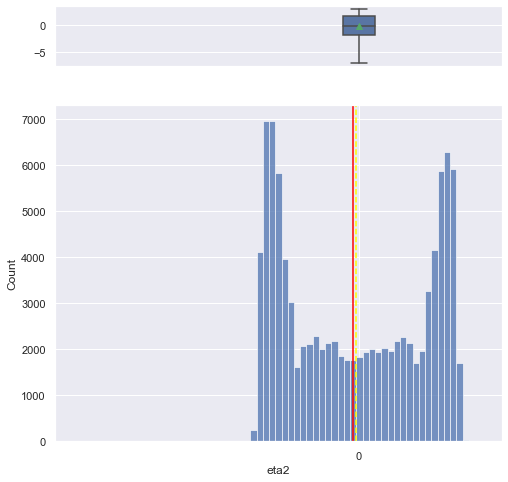

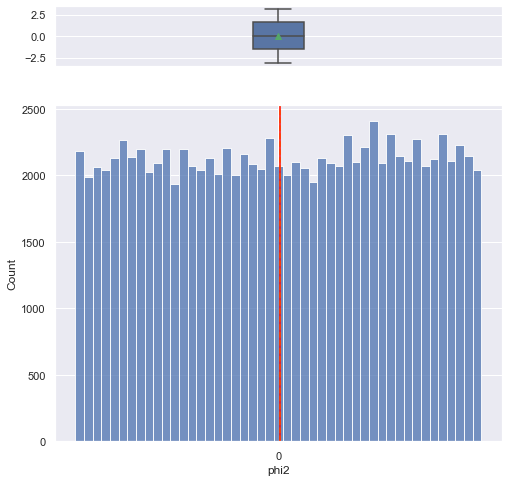

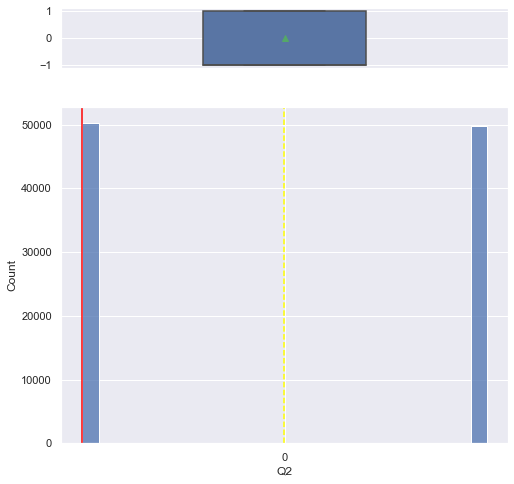

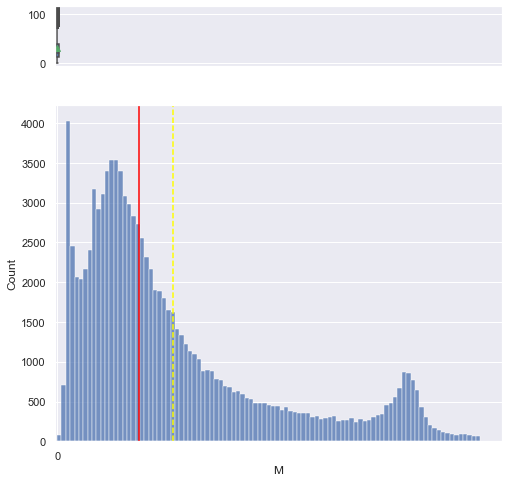

In [11]:
for i in cols:
    hist_box(i)

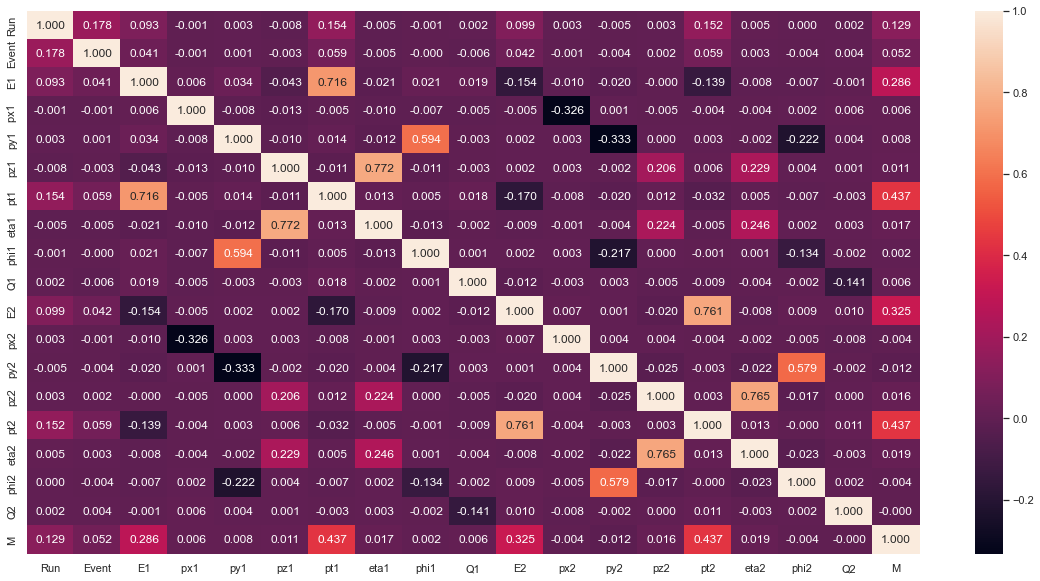

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,fmt='.3f')
plt.show()

In [13]:
x=data.drop(['M'],axis=1)
y=data[['M']]

In [14]:
x.shape

(100000, 18)

In [15]:
y.shape

(100000, 1)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25)

In [17]:
x_train.shape

(75000, 18)

In [18]:
x_train=x_train.values.reshape((75000,1,18))

In [19]:
x_train

array([[[ 1.48031000e+05,  4.67764543e+08,  3.63018000e+00, ...,
          2.42822000e+00, -1.58790000e+00,  1.00000000e+00]],

       [[ 1.47115000e+05,  2.96530467e+08,  5.41887000e+01, ...,
         -4.41385000e-01,  1.87314000e+00,  1.00000000e+00]],

       [[ 1.49181000e+05,  9.40049123e+08,  2.55480000e+00, ...,
         -2.20347000e+00,  1.80999000e+00,  1.00000000e+00]],

       ...,

       [[ 1.47115000e+05,  5.77773619e+08,  6.98143000e+00, ...,
         -1.22010000e+00, -2.44857000e+00, -1.00000000e+00]],

       [[ 1.48029000e+05,  2.23484671e+08,  1.78026000e+01, ...,
          1.66693000e+00,  1.96478000e+00, -1.00000000e+00]],

       [[ 1.46511000e+05,  2.51317764e+08,  2.94565000e+00, ...,
         -5.39115000e-01, -7.87216000e-01,  1.00000000e+00]]])

In [20]:
x_train.shape

(75000, 1, 18)

In [21]:
x_test.shape

(25000, 18)

In [22]:
x_test=x_test.values.reshape((25000,1,18))

In [23]:
x_test


array([[[ 1.49011000e+05,  2.96475190e+07,  7.84972000e+00, ...,
         -1.60167000e+00,  1.42833000e+00,  1.00000000e+00]],

       [[ 1.47926000e+05,  3.31010680e+07,  2.15621000e+01, ...,
         -8.78407000e-01,  2.69220000e+00, -1.00000000e+00]],

       [[ 1.46644000e+05,  5.25272510e+07,  5.66752000e+01, ...,
         -1.01006000e+00, -8.18396000e-01, -1.00000000e+00]],

       ...,

       [[ 1.47115000e+05,  1.40669634e+08,  4.44272000e+01, ...,
         -1.24278000e+00,  7.51677000e-01,  1.00000000e+00]],

       [[ 1.49011000e+05,  8.14749426e+08,  3.38676000e+01, ...,
         -4.85071000e-01, -3.07190000e+00,  1.00000000e+00]],

       [[ 1.47929000e+05,  2.36923141e+08,  2.21561000e+01, ...,
         -1.65379000e+00, -5.06292000e-01, -1.00000000e+00]]])

In [24]:
x_test.shape

(25000, 1, 18)

In [25]:
y_train.shape

(75000, 1)

In [26]:
y_test.shape

(25000, 1)

In [27]:
model = Sequential()

model.add(LSTM(18, input_shape=(1, 18), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(18, input_shape=(1, 18), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(18, input_shape=(1, 18), return_sequences=False))
model.add(Dense(1, activation='relu'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 18)             2664      
_________________________________________________________________
dropout (Dropout)            (None, 1, 18)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 18)             2664      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 18)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 18)                2664      
_________________________________________________________________
dense (Dense)                (None, 1)                 19        
Total params: 8,011
Trainable params: 8,011
Non-trainable params: 0
______________________________________________________

In [28]:
model.compile(optimizer ='adam', loss = 'mse',metrics=['Accuracy'])

In [29]:
model.fit(x_train,y_train,batch_size = 2500,epochs = 40,verbose=1)

Epoch 1/40
30/30 [==============================] - 0s 4ms/step - loss: 1536.2805 - accuracy: 0.0000e+00
Epoch 2/40
30/30 [==============================] - 0s 3ms/step - loss: 1525.6276 - accuracy: 0.0000e+00
Epoch 3/40
30/30 [==============================] - 0s 3ms/step - loss: 1502.6302 - accuracy: 0.0000e+00
Epoch 4/40
30/30 [==============================] - 0s 3ms/step - loss: 1453.2755 - accuracy: 0.0000e+00
Epoch 5/40
30/30 [==============================] - 0s 3ms/step - loss: 1373.6687 - accuracy: 0.0000e+00
Epoch 6/40
30/30 [==============================] - 0s 3ms/step - loss: 1284.5542 - accuracy: 0.0000e+00
Epoch 7/40
30/30 [==============================] - 0s 3ms/step - loss: 1207.0714 - accuracy: 0.0000e+00
Epoch 8/40
30/30 [==============================] - 0s 3ms/step - loss: 1147.1395 - accuracy: 0.0000e+00
Epoch 9/40
30/30 [==============================] - 0s 3ms/step - loss: 1100.5586 - accuracy: 0.0000e+00
Epoch 10/40
30/30 [==============================] - 0s

In [30]:
predicted_electron_mass = model.predict(x_test)

In [31]:
loss = model.evaluate(x_test,y_test,batch_size = 50)
print('Loss is :',loss)

500/500 [==============================] - 0s 987us/step - loss: 689.6161 - accuracy: 0.0000e+00
Loss is : [689.6160888671875, 0.0]


In [32]:
predicted_mass = model.predict(x_test)

In [33]:
print('The Root Mean Squared Error is:',mean_squared_error(y_test,predicted_mass))

The Root Mean Squared Error is: 689.6157481531645


In [35]:
model_1 = Sequential()

model_1.add(Dense(136, input_shape=(18,)))
model_1.add(Dense(68,activation='relu'))
model_1.add(Dense(34,activation='relu'))
model_1.add(Dense(17,activation='relu'))
model_1.add(Dense(1, ))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 136)               2584      
_________________________________________________________________
dense_2 (Dense)              (None, 68)                9316      
_________________________________________________________________
dense_3 (Dense)              (None, 34)                2346      
_________________________________________________________________
dense_4 (Dense)              (None, 17)                595       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 18        
Total params: 14,859
Trainable params: 14,859
Non-trainable params: 0
_________________________________________________________________


In [45]:
x_test_1=x_test.reshape((25000,18))

In [46]:
x_train_1=x_train.reshape((75000,18))

In [48]:
ss = StandardScaler()
x_train_1 = ss.fit_transform(x_train_1)
x_test_1 = ss.fit_transform(x_test_1)

In [41]:
model_1.compile(optimizer ='adam', loss = 'mse',metrics=['mse'])

In [49]:
model_1.fit(x_train_1,y_train,batch_size = 25,epochs = 40,verbose=1)

Epoch 1/40
3000/3000 [==============================] - 2s 666us/step - loss: 72.8382 - mse: 72.8382
Epoch 2/40
3000/3000 [==============================] - 2s 676us/step - loss: 17.0070 - mse: 17.0070
Epoch 3/40
3000/3000 [==============================] - 2s 664us/step - loss: 10.3998 - mse: 10.3998
Epoch 4/40
3000/3000 [==============================] - 2s 667us/step - loss: 8.1587 - mse: 8.1587
Epoch 5/40
3000/3000 [==============================] - 2s 691us/step - loss: 7.2867 - mse: 7.2867
Epoch 6/40
3000/3000 [==============================] - 2s 694us/step - loss: 5.7834 - mse: 5.7834
Epoch 7/40
3000/3000 [==============================] - 2s 715us/step - loss: 5.2793 - mse: 5.2793
Epoch 8/40
3000/3000 [==============================] - 2s 689us/step - loss: 4.7483 - mse: 4.7483
Epoch 9/40
3000/3000 [==============================] - 2s 666us/step - loss: 4.6725 - mse: 4.6725
Epoch 10/40
3000/3000 [==============================] - 2s 676us/step - loss: 4.1832 - mse: 4.1832
Epo

In [50]:
predicted_electron_mass_1 = model_1.predict(x_test_1)

In [52]:
print('The Root Mean Squared Error is:',mean_squared_error(y_test,predicted_electron_mass_1))

The Root Mean Squared Error is: 2.506398066361006
